<img src='https://www.anadronestarting.com/wp-content/uploads/intel-main_opt.png' width=50%>

# 모바일넷을 이용한 이미지분류
<font size=5><b>(Image Classification using Mobilenet)<b></font>

<div align='right'>성  민  석<br>(Minsuk Sung)</div>

<img src='https://chaosmail.github.io/images/deep-learning/classification.png' width=60%>

---

<h1>강의목차<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#필요한-라이브러리-및-옵션" data-toc-modified-id="필요한-라이브러리-및-옵션-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>필요한 라이브러리 및 옵션</a></span><ul class="toc-item"><li><span><a href="#기본-라이브러리(Library)" data-toc-modified-id="기본-라이브러리(Library)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>기본 라이브러리(Library)</a></span></li><li><span><a href="#옵션(Option)" data-toc-modified-id="옵션(Option)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>옵션(Option)</a></span></li></ul></li><li><span><a href="#예제---VOC2012" data-toc-modified-id="예제---VOC2012-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>예제 - VOC2012</a></span><ul class="toc-item"><li><span><a href="#VOC-2012란?" data-toc-modified-id="VOC-2012란?-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>VOC 2012란?</a></span></li><li><span><a href="#VOC-데이터의-구성" data-toc-modified-id="VOC-데이터의-구성-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>VOC 데이터의 구성</a></span></li><li><span><a href="#다운로드-링크" data-toc-modified-id="다운로드-링크-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>다운로드 링크</a></span></li><li><span><a href="#학습에-필요한-상수" data-toc-modified-id="학습에-필요한-상수-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>학습에 필요한 상수</a></span></li><li><span><a href="#모델-컴파일" data-toc-modified-id="모델-컴파일-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>모델 컴파일</a></span></li><li><span><a href="#모델-학습하기" data-toc-modified-id="모델-학습하기-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>모델 학습하기</a></span></li><li><span><a href="#모델-저장하기" data-toc-modified-id="모델-저장하기-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>모델 저장하기</a></span></li><li><span><a href="#모델-평가하기" data-toc-modified-id="모델-평가하기-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>모델 평가하기</a></span></li><li><span><a href="#테스트해보기" data-toc-modified-id="테스트해보기-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>테스트해보기</a></span></li></ul></li><li><span><a href="#참고" data-toc-modified-id="참고-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>참고</a></span></li></ul></div>

## 필요한 라이브러리 및 옵션

### 기본 라이브러리(Library)

In [1]:
import os
import sys
import glob
import random
import itertools
from pathlib import Path
from tqdm import tqdm
import pickle

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [3]:
import cv2
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw
from IPython.display import SVG
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import xml.etree.ElementTree as ET
from xml.etree.ElementTree import Element, ElementTree

In [4]:
import keras
import tensorflow as tf
from tensorflow.keras.datasets import mnist,cifar10
from tensorflow.keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator
from tensorflow.keras.applications import MobileNet, MobileNetV2
from tensorflow.keras.models import Model,Sequential,load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Conv2D,GlobalAveragePooling2D
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.utils import to_categorical,plot_model
from tensorflow.keras.losses import categorical_crossentropy,binary_crossentropy
from tensorflow.keras.callbacks import Callback
from tensorflow.python.client import device_lib

Using TensorFlow backend.
/home/intel/imobilenet/myvenv/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/intel/imobilenet/myvenv/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/intel/imobilenet/myvenv/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/intel/imobilenet/myvenv/lib/p

### 옵션(Option)

In [5]:
os.environ["CUDA_VISIBLE_DEVICES"]="0"
%matplotlib inline
print(device_lib.list_local_devices())
keras.backend.tensorflow_backend._get_available_gpus()

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15566857310825933275
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 12272424602718616874
physical_device_desc: "device: XLA_CPU device"
]


[]

---

## 예제 - VOC2012

![](http://host.robots.ox.ac.uk/pascal/VOC/voc2012/pascal2.png)

### VOC 2012란?
VOC2012 : Visual Object Classes Challenge 2012 (VOC2012)

### VOC 데이터의 구성
PASCAL VOC Dataset을 다운받아 압축을 풀면 다음과 같은 구조를 확인할 수 있습니다.
```
VOC2012
├── Annotations
│   ├── 2010_000002.xml
│   ├── 2010_000003.xml
│   ├── 2011_000002.xml
│   └── ...
├── ImageSets
│   ├── Action
│   ├── Layout
│   ├── Main
│   └── Segmentation
├── JPEGImages
│   ├── 2010_000002.jpg
│   ├── 2010_000003.jpg
│   ├── 2011_000002.jpg
│   └── ...
├── SegmentationClass
│   ├── 2010_000002.png
│   ├── 2010_000003.png
│   └── 2011_000003.png
└── SegmentationObject
    ├── 2010_000002.png
    ├── 2010_000003.png
    └── ...
```

- Annotations : JPEGImages 폴더 속 원본 이미지와 같은 이름들의 xml파일들이 존재합니다. Object Detection을 위한 정답 데이터이 됩니다.

- ImageSets : 어떤 이미지 그룹을 test, train, trainval, val로 사용할 것인지, 특정 클래스가 어떤 이미지에 있는지 등에 대한 정보들을 포함하고 있는 폴더입니다.

- JPEGImages : jpg확장자를 가진 이미지 파일들이 모여있는 폴더입니다. Object Detection에서 입력 데이터가 됩니다.

- SegmentationClass : Semantic segmentation을 학습하기 위한 label 이미지입니다.

- SegmentationObject : Instance segmentation을 학습하기 위한 label 이미지입니다.

Object Detection을 할 때는 주로 Annotations, JPEGImages폴더가 사용됩니다. 모델에 입력으로 넣는 입력데이터인 경우 그냥 load 해서 사용하면 되나, 지도학습에 핵심이 되는 정답 데이터의 경우는 parsing이 필요한 경우가 있으므로 Annotations의 xml 구조는 잘 알아두는 것이 중요합니다.

출처 : https://deepbaksuvision.github.io/Modu_ObjectDetection/posts/02_01_PASCAL_VOC.html

### 다운로드 링크
- http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
- https://pjreddie.com/projects/pascal-voc-dataset-mirror/

> VOC 2012 데이터는 한 이미지 내에 여러가지 객체가 존재합니다. 그래서 기존의 방법과는 조금 다르게 접근해야합니다.  
아래 코드를 따라가봅시다.

In [6]:
# 우리가 분류할 20개의 클래스
CLASSES = ['person',  # Person
           'bird', 'cat', 'cow', 'dog', 'horse', 'sheep', # Animal
           'aeroplane', 'bicycle', 'boat', 'bus', 'car', 'motorbike', 'train', # Vehicle
           'bottle', 'chair', 'dining table', 'potted plant', 'sofa' # Indoor
          ]

### 학습에 필요한 상수

In [7]:
# 학습에 필요한 상수들
IMG_SHAPE = (224, 224, 3)
LEARNING_RATE = 2e-5
BATCH_SIZE = 4
EPOCHS = 3

# 각 이미지의 기본 주소
BASE_PATH = './data/VOC2012/JPEGImages/'
images_dir = Path(BASE_PATH).expanduser()
print(images_dir)

# 각 이미지별 클래스의 기본 주소
XML_BASE_PATH = './data/VOC2012/Annotations/'
annotations_dir = Path(XML_BASE_PATH).expanduser()
print(annotations_dir)

data/VOC2012/JPEGImages
data/VOC2012/Annotations


--------------------------------------------------
Image properties
--------------------------------------------------
File : ./data/VOC2012/JPEGImages/2008_005431.jpg
width : 373
height : 280
channels : 3



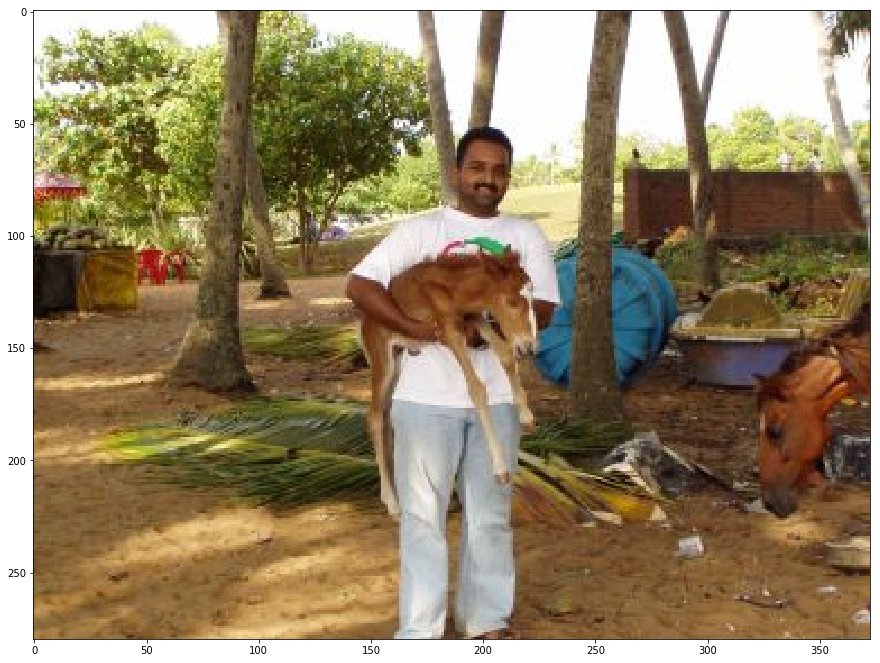

--------------------------------------------------
Objects Description
--------------------------------------------------
class : horse
xmin : 320, ymin : 128
xmax : 373, ymax : 227

class : horse
xmin : 143, ymin : 104
xmax : 226, ymax : 229

class : person
xmin : 140, ymin :  52
xmax : 236, ymax : 280



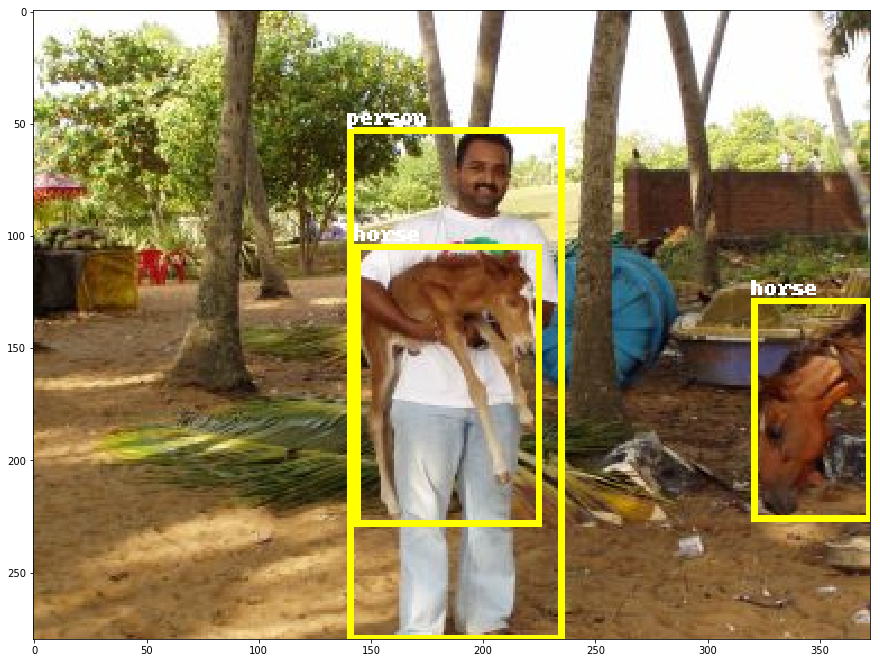

In [8]:
flist = glob.glob(BASE_PATH+'*.jpg')
idx = np.random.randint(0,len(flist))
fpath = flist[idx]
img = cv2.imread(fpath)
fname = os.path.basename(fpath).split('.')[0]

image = Image.open(fpath).convert("RGB")
draw = ImageDraw.Draw(image)

xml = open(XML_BASE_PATH+fname+'.xml', "r")
tree = ET.parse(xml)
root = tree.getroot()

size = root.find("size")

width = size.find("width").text
height = size.find("height").text
channels = size.find("depth").text

print('-'*50)
print("Image properties")
print('-'*50)
print('File : {}'.format(fpath))
print("width : {}\nheight : {}\nchannels : {}\n".format(width, height, channels))
plt.figure(figsize=(15,12))
plt.imshow(image)
plt.show()

objects = root.findall("object")
print('-'*50)
print("Objects Description")
print('-'*50)
for _object in objects:
    name = _object.find("name").text
    bndbox = _object.find("bndbox")
    xmin = int(bndbox.find("xmin").text)
    ymin = int(bndbox.find("ymin").text)
    xmax = int(bndbox.find("xmax").text)
    ymax = int(bndbox.find("ymax").text)
    
    # Box를 그릴 때, 왼쪽 상단 점(xmin,ymin)과, 오른쪽 하단 점의 좌표(xmax,ymax)를 입력으로 주면 됩니다.
    draw.rectangle(((xmin, ymin), (xmax, ymax)), outline="yellow",width=3)
    draw.text((xmin, ymin-10), name,align='center')

    print("class : {:3}\nxmin : {:3}, ymin : {:3}\nxmax : {:3}, ymax : {:3}\n".format(name, xmin, ymin, xmax, ymax))

plt.figure(figsize=(15,12))
plt.imshow(image)
plt.show()

In [9]:
def xml_to_labels(xml_data, unique_labels):
    root = ET.XML(xml_data)
    labels = set() if unique_labels else []
    labels_add = labels.add if unique_labels else labels.append # speeds up method lookup
    for i, child in enumerate(root):
        if child.tag == 'filename':
            img_filename = child.text
        if child.tag == 'object':
            for subchild in child:
                if subchild.tag == 'name':
                    labels_add(subchild.text)
    return img_filename, list(labels)

def get_labels(annotations_dir, unique_labels=True):
    for annotation_file in annotations_dir.iterdir():
        with open(annotation_file) as f:
            yield xml_to_labels(f.read(), unique_labels)

In [10]:
# img_metadata = pd.DataFrame(get_labels(annotations_dir), columns=['filename', 'labels'])
# print('Found {} images'.format(len(img_metadata)))
# img_metadata.sample(5)

In [11]:
# all_labels = [label for lbs in img_metadata['labels'] for label in lbs]
# labels_count = Counter(all_labels)
# ax = sns.countplot(all_labels, order=[k for k, _ in labels_count.most_common()], log=True)
# ax.set_title('Number of images with a class label')
# ax.set_ylim(1E2, 1E4)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# plt.show()

In [12]:
# height, width, size = np.empty(len(img_metadata)), np.empty(len(img_metadata)), np.empty(len(img_metadata)) 
# for i, img_filepath in img_metadata['filename'].iteritems():
#     w, h = Image.open(images_dir.joinpath(img_filepath)).size
#     width[i], height[i], size[i] = w, h, w * h * 3 * 1E-6
# plt.scatter(width, height, alpha=0.5)
# plt.xlabel('Width'); plt.ylabel('Height'); plt.show()
# plt.hist(size, bins=50, log=True)
# plt.xlabel('Image size (MB)');
# plt.ylabel('Count');

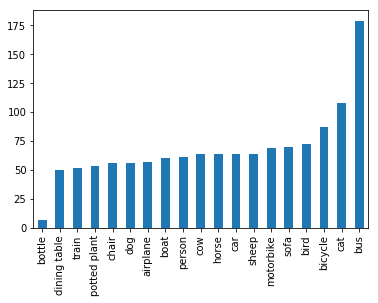

bottle            7
dining table     50
train            52
potted plant     53
chair            56
dog              56
airplane         57
boat             60
person           61
cow              64
horse            64
car              64
sheep            64
motorbike        69
sofa             70
bird             72
bicycle          87
cat             108
bus             179
dtype: int64


In [13]:
class_list = []
num_list = []

IMAGE_BASE_PATH = './data/VOC4IC_original/'
train_path = IMAGE_BASE_PATH + 'train/'
for folder in os.listdir(train_path):
    folder_size = len(os.listdir(train_path+folder))
#     print('{:<15} : {}'.format(folder,folder_size))
    class_list.append(folder)
    num_list.append(folder_size)
    
voc_s = pd.Series(num_list,index=class_list)
voc_s.sort_values().plot(kind='bar')
plt.show()

print(voc_s.sort_values())

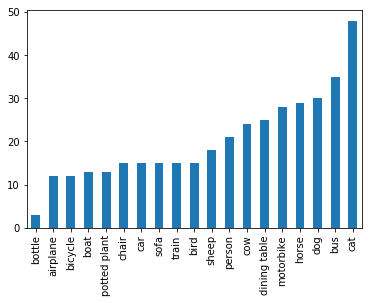

bottle           3
airplane        12
bicycle         12
boat            13
potted plant    13
chair           15
car             15
sofa            15
train           15
bird            15
sheep           18
person          21
cow             24
dining table    25
motorbike       28
horse           29
dog             30
bus             35
cat             48
dtype: int64


In [14]:
class_list = []
num_list = []

IMAGE_BASE_PATH = './data/VOC4IC_original/'
valid_path = IMAGE_BASE_PATH + 'valid/'
for folder in os.listdir(valid_path):
    folder_size = len(os.listdir(valid_path+folder))
#     print('{:<15} : {}'.format(folder,folder_size))
    class_list.append(folder)
    num_list.append(folder_size)
    
voc_s = pd.Series(num_list,index=class_list)
voc_s.sort_values().plot(kind='bar')
plt.show()

print(voc_s.sort_values())

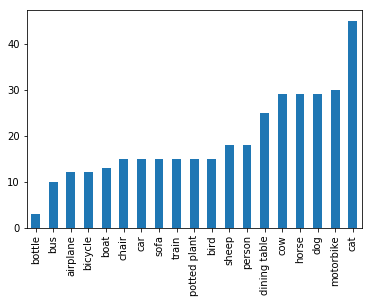

bottle           3
bus             10
airplane        12
bicycle         12
boat            13
chair           15
car             15
sofa            15
train           15
potted plant    15
bird            15
sheep           18
person          18
dining table    25
cow             29
horse           29
dog             29
motorbike       30
cat             45
dtype: int64


In [15]:
class_list = []
num_list = []

IMAGE_BASE_PATH = './data/VOC4IC_original/'
test_path = IMAGE_BASE_PATH + 'test/'
for folder in os.listdir(test_path):
    folder_size = len(os.listdir(test_path+folder))
#     print('{:<15} : {}'.format(folder,folder_size))
    class_list.append(folder)
    num_list.append(folder_size)
    
voc_s = pd.Series(num_list,index=class_list)
voc_s.sort_values().plot(kind='bar')
plt.show()

print(voc_s.sort_values())

In [16]:
base_model = MobileNetV2(input_shape=(224,224,3),
                         include_top=False,
                         weights='imagenet')
base_model.trainable = False

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [17]:
set_trainable = False
for layer in tqdm(base_model.layers):
    if layer.name in ['block_14_expand','block_15_expand', 'block_16_expand']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

100%|██████████| 155/155 [00:00<00:00, 41461.55it/s]


In [18]:
layers = [(layer, layer.name, layer.trainable) for layer in base_model.layers]

pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable']) 

,Layer Type,Layer Name,Layer Trainable
0,<tensorflow.python.keras.engine.input_layer.In...,input_1,False
1,<tensorflow.python.keras.layers.convolutional....,Conv1_pad,False
2,<tensorflow.python.keras.layers.convolutional....,Conv1,False
3,<tensorflow.python.keras.layers.normalization....,bn_Conv1,False
4,<tensorflow.python.keras.layers.advanced_activ...,Conv1_relu,False
5,<tensorflow.python.keras.layers.convolutional....,expanded_conv_depthwise,False
6,<tensorflow.python.keras.layers.normalization....,expanded_conv_depthwise_BN,False
7,<tensorflow.python.keras.layers.advanced_activ...,expanded_conv_depthwise_relu,False
8,<tensorflow.python.keras.layers.convolutional....,expanded_conv_project,False
9,<tensorflow.python.keras.layers.normalization....,expanded_conv_project_BN,False


In [19]:
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512,activation='relu'),
    Dense(64,activation='relu'),
    Dense(len(CLASSES), activation='softmax')
])
model.summary()

plot_model(model,to_file='./img/model/voc2012_mobilenet_model.png',show_shapes=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               655872    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_2 (Dense)              (None, 19)                1235      
Total params: 2,947,923
Trainable params: 689,939
Non-trainable params: 2,257,984
_________________________________________________________________
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


### 모델 컴파일

In [20]:
model.compile(loss=categorical_crossentropy, 
              optimizer=Adam(learning_rate=0.0001), # transfer learning 여기서 학습률을 더 작게 
              metrics=['acc'])

### 모델 학습하기

In [21]:
train_datagen = ImageDataGenerator(rotation_range=30,
                                   rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest'
                                   )

train_set = train_datagen.flow_from_directory(IMAGE_BASE_PATH + 'train/',
                                              target_size=(224, 224),
                                              batch_size=8,
                                              shuffle=True,
                                              class_mode='categorical')

Found 1293 images belonging to 19 classes.


In [22]:
valid_datagen = ImageDataGenerator(rescale=1./255)

valid_set = valid_datagen.flow_from_directory(IMAGE_BASE_PATH + 'valid/',
                                            target_size=(224, 224),
                                            batch_size=8,
                                            shuffle=True,
                                            class_mode='categorical')

Found 386 images belonging to 19 classes.


In [23]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory(IMAGE_BASE_PATH + 'test/',
                                            target_size=(224, 224),
                                            batch_size=8,
                                            shuffle=True,
                                            class_mode='categorical')

Found 363 images belonging to 19 classes.


In [24]:
history = model.fit_generator(train_set,
                              steps_per_epoch=train_set.n // train_set.batch_size,
                              epochs=10,
                              validation_data=valid_set,
                              validation_steps=valid_set.n // valid_set.batch_size,
#                               use_multiprocessing=True,
                              )

Epoch 1/10
161/161 [==============================] - 44s 272ms/step - loss: 2.3158 - acc: 0.3471 - val_loss: 1.6075 - val_acc: 0.6120
Epoch 2/10
161/161 [==============================] - 39s 240ms/step - loss: 1.2728 - acc: 0.6732 - val_loss: 0.8648 - val_acc: 0.8021
Epoch 3/10
161/161 [==============================] - 39s 241ms/step - loss: 0.9076 - acc: 0.7541 - val_loss: 0.5581 - val_acc: 0.8646
Epoch 4/10
161/161 [==============================] - 39s 241ms/step - loss: 0.7546 - acc: 0.7922 - val_loss: 0.5637 - val_acc: 0.8203
Epoch 5/10
161/161 [==============================] - 39s 242ms/step - loss: 0.6752 - acc: 0.7930 - val_loss: 0.3906 - val_acc: 0.8984
Epoch 6/10
161/161 [==============================] - 39s 243ms/step - loss: 0.6077 - acc: 0.8163 - val_loss: 0.3330 - val_acc: 0.9115
Epoch 7/10
161/161 [==============================] - 39s 243ms/step - loss: 0.6021 - acc: 0.8218 - val_loss: 0.3468 - val_acc: 0.8984
Epoch 8/10
161/161 [==============================] - 3

### 모델 저장하기

In [25]:
model.save('./bin/mobilenetv2_class20.h5')

In [26]:
test_set.class_indices.items()

dict_items([('motorbike', 13), ('sheep', 16), ('sofa', 17), ('car', 6), ('boat', 3), ('airplane', 0), ('dining table', 10), ('potted plant', 15), ('bird', 2), ('bus', 5), ('horse', 12), ('chair', 8), ('train', 18), ('bottle', 4), ('cow', 9), ('cat', 7), ('dog', 11), ('person', 14), ('bicycle', 1)])

In [27]:
class20 = dict()
for key,value in test_set.class_indices.items():
    class20[value] = key

with open('./bin/class20.pickle', 'wb') as f:
    pickle.dump(class20, f)

In [28]:
class20

{0: 'airplane',
 1: 'bicycle',
 2: 'bird',
 3: 'boat',
 4: 'bottle',
 5: 'bus',
 6: 'car',
 7: 'cat',
 8: 'chair',
 9: 'cow',
 10: 'dining table',
 11: 'dog',
 12: 'horse',
 13: 'motorbike',
 14: 'person',
 15: 'potted plant',
 16: 'sheep',
 17: 'sofa',
 18: 'train'}

### 모델 평가하기

In [29]:
train_loss, train_acc = model.evaluate_generator(train_set)
print('Train Loss : {}'.format(train_loss))
print('Train Accuracy : {}'.format(train_acc))

test_loss, test_acc = model.evaluate_generator(test_set)
print('Test Loss : {}'.format(test_loss))
print('Test Accuracy : {}'.format(test_acc))

Train Loss : 0.27170445759677225
Train Accuracy : 0.9118329286575317
Test Loss : 0.32980251952033973
Test Accuracy : 0.9008264541625977


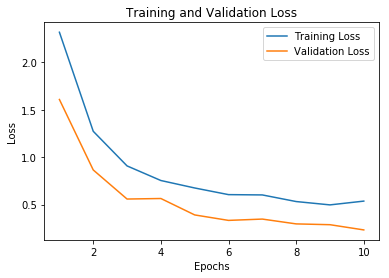

In [30]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,label='Training Loss')
plt.plot(epochs,val_loss,label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

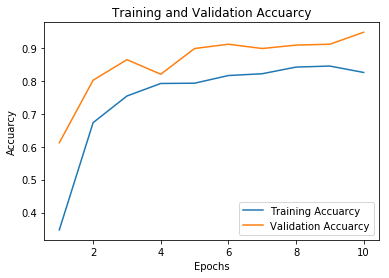

In [31]:
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1,len(loss)+1)

plt.plot(epochs,acc,label='Training Accuarcy')
plt.plot(epochs,val_acc,label='Validation Accuarcy')
plt.title('Training and Validation Accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()

plt.show()

### 테스트해보기

In [32]:
def predict_test_img(path):
    img = cv2.imread(path) 
    
    model = load_model('./bin/mobilenetv2_class20.h5')
    
    print('Original Shape : ',img.shape)
    
    img = cv2.resize(img, (224,224), fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img / 255
    print('Resized Shape : ',img.shape)
    plt.imshow(img)
    plt.show()
    
    ans = model.predict_classes(np.expand_dims(img,axis=0))
    with open('./bin/class20.pickle','rb') as f:
        class20 = pickle.load(f)
    print('Predict : {}'.format(class20[ans[0]]))
    
    predicted_result = model.predict(np.expand_dims(img,axis=0))

    pd.DataFrame(predicted_result,columns=class20.values()).iloc[0].plot(kind='bar')
    plt.show()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Original Shape :  (428, 590, 3)
Resized Shape :  (224, 224, 3)


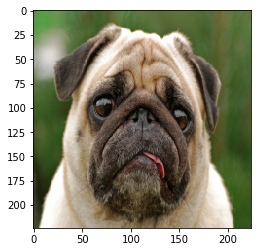

Predict : dog


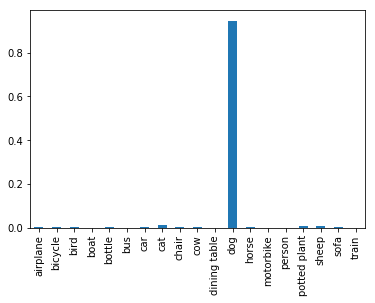

In [33]:
predict_test_img('img/test/dog.jpg')

Original Shape :  (165, 305, 3)
Resized Shape :  (224, 224, 3)


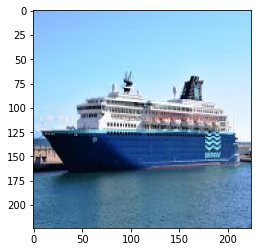

Predict : boat


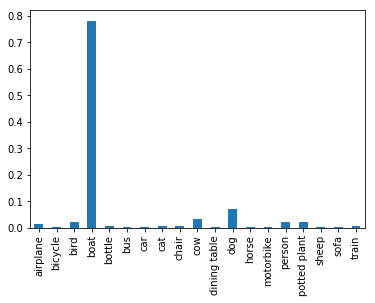

In [34]:
predict_test_img('img/test/boat.jpg')

Original Shape :  (260, 194, 3)
Resized Shape :  (224, 224, 3)


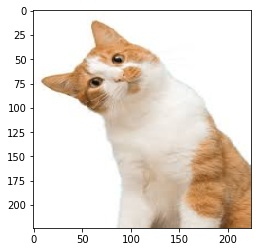

Predict : cat


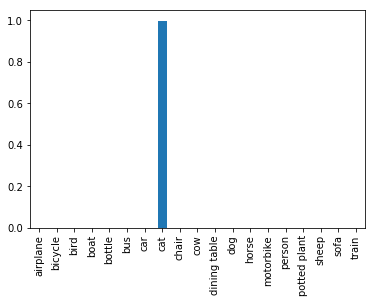

In [35]:
predict_test_img('img/test/cat.jpg')

Original Shape :  (440, 750, 3)
Resized Shape :  (224, 224, 3)


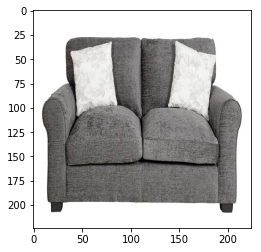

Predict : sofa


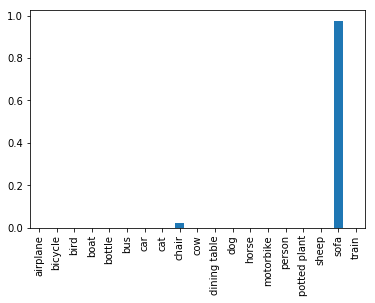

In [36]:
predict_test_img('img/test/sofa.jpg')

Original Shape :  (655, 1000, 3)
Resized Shape :  (224, 224, 3)


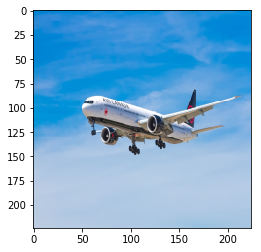

Predict : airplane


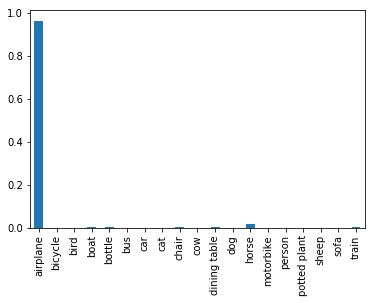

In [37]:
predict_test_img('img/test/aeroplane.jpg')

Original Shape :  (175, 289, 3)
Resized Shape :  (224, 224, 3)


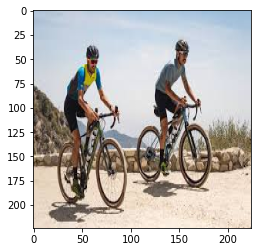

Predict : bicycle


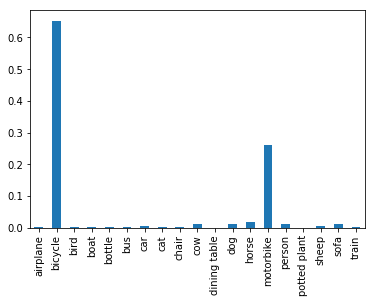

In [38]:
predict_test_img('img/test/person_bike.jpg')

---

## 참고

- Intel
    - https://www.intel.co.kr/
- Intel OpenVINO
    - https://software.intel.com/en-us/openvino-toolkit
- MNIST
    - http://yann.lecun.com/exdb/mnist/
- CIFAR10
    - https://www.cs.toronto.edu/~kriz/cifar.html
- ImageNet
    - http://www.image-net.org
- Tensorflow
    - https://www.tensorflow.org/?hl=ko
- Keras
    - https://keras.io/
    - https://tensorflow.blog/2019/03/06/tensorflow-2-0-keras-api-overview/
    - https://tykimos.github.io/2017/02/22/Integrating_Keras_and_TensorFlow/
    - https://tykimos.github.io/2017/03/08/CNN_Getting_Started/
    - https://raw.githubusercontent.com/keras-team/keras-docs-ko/master/sources/why-use-keras.md
- Keras to Caffe
     - https://github.com/uhfband/keras2caffe
     - http://www.deepvisionconsulting.com/from-keras-to-caffe/
- Fully Connected Layer
    - https://sonofgodcom.wordpress.com/2018/12/31/cnn%EC%9D%84-%EC%9D%B4%ED%95%B4%ED%95%B4%EB%B3%B4%EC%9E%90-fully-connected-layer%EB%8A%94-%EB%AD%94%EA%B0%80/
- Convultional Nueral Network
    - http://aikorea.org/cs231n/convolutional-networks/
    - http://cs231n.stanford.edu/
- CNN Models
    - https://ratsgo.github.io/deep%20learning/2017/10/09/CNNs/

- VOC2012
    - https://blog.godatadriven.com/rod-keras-multi-label
    - https://gist.github.com/rragundez/ae3a17428bfec631d1b35dcdc6296a85#file-multi-label_classification_with_keras_imagedatagenerator-ipynbhttps://fairyonice.github.io/Part_5_Object_Detection_with_Yolo_using_VOC_2012_data_training.html
    - http://research.sualab.com/introduction/2017/11/29/image-recognition-overview-1.html